## 仕入商品分析Ⅷ

- 仕入商品分析Ⅲ.csvからグラフ作成

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install japanize-matplotlib
import japanize_matplotlib

     |████████████████████████████████| 4.1 MB 5.2 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120274 sha256=4f9caca9ef96e48ad3dc26d2f89708df11d5eed66fc272505ca1b5d43fbd6808
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Purchased_products/csv/仕入商品分析Ⅲ.csv", encoding='cp932')

In [ ]:
del df['Unnamed: 0']

In [ ]:
df = df[(df['対象月'] >= 202006) & (df['対象月'] <= 202105)]
df['対象月'].unique()

array([202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101,
       202102, 202103, 202104, 202105])

In [ ]:
tmp_df = df.groupby(['対象月']).sum()

In [ ]:
df.columns

Index(['対象月', '品目', '大分類', '小分類', '品名', '規格', '販売数量', '販売金額', '仕入数', '仕入金額',
       '期首在庫数', '期首在庫金額', '期末在庫数', '期末在庫金額', '原価', '粗利額'],
      dtype='object')

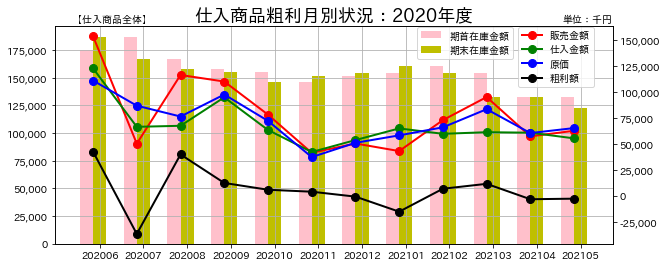

In [ ]:
# matplotlib

import warnings
warnings.simplefilter('ignore')

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

left = np.arange(0,12)
width = 0.3
labels = tmp_df.index

ax1.bar(left - width / 2, tmp_df['期首在庫金額']/1000, color='pink', label='期首在庫金額', width=width)
ax1.bar(left + width / 2, tmp_df['期末在庫金額']/1000, color='y', label='期末在庫金額', tick_label=labels, width=width)
ax2.plot(left, tmp_df['販売金額']/1000, linewidth=2, color="r", linestyle="solid", marker="o", markersize=8, label='販売金額')
ax2.plot(left, tmp_df['仕入金額']/1000, linewidth=2, color="g", linestyle="solid", marker="o", markersize=8, label='仕入金額')
ax2.plot(left, tmp_df['原価']/1000, linewidth=2, color="b", linestyle="solid", marker="o", markersize=8, label='原価')
ax2.plot(left, tmp_df['粗利額']/1000, linewidth=2, color="black", linestyle="solid", marker="o", markersize=8, label='粗利額')

plt.title('仕入商品粗利月別状況：2020年度', fontsize=18)
fig.text(0.26, 0.92, '【仕入商品全体】', ha='right', va='top')
fig.text(0.9, 0.92, '単位：千円', ha='right', va='top')
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

ax1.legend(loc=(0.65, 0.85))
ax2.legend(loc=(0.83, 0.72))
ax1.grid()
plt.show()

In [ ]:
tmp_df['粗利額'].sum()

65581734

In [ ]:
df['大分類'].unique()

In [ ]:
dai_list = ['113_', '112_', '114_', '117_']

In [ ]:
for dai_nm in dai_list: 
    tmp_df = df[df['大分類'] == dai_nm]
    tmp_df = tmp_df.groupby(['対象月', '大分類']).sum()

    fig = plt.figure(figsize=(10,4))
    ax1 = fig.add_subplot(111)
    ax2 = ax1.twinx()

    left = np.arange(0,12)
    width = 0.3
    tmp_list = list(tmp_df.index)
    tmp_list_b = []
    for i in range(len(tmp_list)):
        tmp_list_b.append(tmp_list[i][0])
    labels = tmp_list_b

    ax1.bar(left - width / 2, tmp_df['期首在庫金額']/1000, color='pink', label='期首在庫金額', width=width)
    ax1.bar(left + width / 2, tmp_df['期末在庫金額']/1000, color='y', label='期末在庫金額', tick_label=labels, width=width)
    ax2.plot(left, tmp_df['販売金額']/1000, linewidth=2, color="r", linestyle="solid", marker="o", markersize=8, label='販売金額')
    ax2.plot(left, tmp_df['仕入金額']/1000, linewidth=2, color="g", linestyle="solid", marker="o", markersize=8, label='仕入金額')
    ax2.plot(left, tmp_df['原価']/1000, linewidth=2, color="b", linestyle="solid", marker="o", markersize=8, label='原価')
    ax2.plot(left, tmp_df['粗利額']/1000, linewidth=2, color="black", linestyle="solid", marker="o", markersize=8, label='粗利額')

    plt.title('仕入商品粗利月別状況：2020年度', fontsize=18)
    fig.text(0.26, 0.92, '【' + dai_nm + '】', ha='right', va='top')
    fig.text(0.9, 0.92, '単位：千円', ha='right', va='top')
    ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

    ax1.legend(loc=(0.65, 0.85))
    ax2.legend(loc=(0.83, 0.72))
    ax1.grid()
plt.show()

In [ ]:
df['小分類'].unique()

In [ ]:
tmp_df = df[df['大分類'] == '114_']
tmp_df = tmp_df[tmp_df['小分類'] == '413_']
tmp_df = tmp_df.groupby(['対象月', '大分類']).sum()

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

left = np.arange(0,12)
width = 0.3
labels = tmp_df.index

tmp_list = list(tmp_df.index)
tmp_list_b = []
for i in range(len(tmp_list)):
    tmp_list_b.append(tmp_list[i][0])
labels = tmp_list_b

ax1.bar(left - width / 2, tmp_df['期首在庫金額']/1000, color='pink', label='期首在庫金額', width=width)
ax1.bar(left + width / 2, tmp_df['期末在庫金額']/1000, color='y', label='期末在庫金額', tick_label=labels, width=width)
ax2.plot(left, tmp_df['販売金額']/1000, linewidth=2, color="r", linestyle="solid", marker="o", markersize=8, label='販売金額')
ax2.plot(left, tmp_df['仕入金額']/1000, linewidth=2, color="g", linestyle="solid", marker="o", markersize=8, label='仕入金額')
ax2.plot(left, tmp_df['原価']/1000, linewidth=2, color="b", linestyle="solid", marker="o", markersize=8, label='原価')
ax2.plot(left, tmp_df['粗利額']/1000, linewidth=2, color="black", linestyle="solid", marker="o", markersize=8, label='粗利額')

plt.title('仕入商品粗利月別状況：2020年度', fontsize=18)
fig.text(0.26, 0.92, '【413_】', ha='right', va='top')
fig.text(0.9, 0.92, '単位：千円', ha='right', va='top')
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

ax1.legend(loc=(0.65, 0.85))
ax2.legend(loc=(0.83, 0.72))
ax1.grid()
plt.show()